## 각 클러스터 내 제품 간 연관관계 시각화

In [ ]:
import networkx as nx
import pandas as pd

def draw_graph(rules, rules_to_show=10):
    rule_sort = rules.sort_values('lift', ascending=False)
    
    G = nx.DiGraph() # 그래프 생성
    color_map=[] 

    for i in range(rules_to_show):
        row_unit = rule_sort.iloc[i].values # 각 row 별 값을 
        a, c= row_unit[1], row_unit[2]
        target_a = a[a.index('{')+1:a.index('}')].split("', '") # antecedents 노드 이름 parsing
        target_c = c[c.index('{')+1:c.index('}')].split("', '") # consequents 노드 이름 parsing

        for idx, t in enumerate(target_a):
            a = t.strip().replace('\'', '') 
            for idx, j in enumerate(target_c):
                c = j.strip().replace('\'', '')
                if a == c : # 상호연관관계는 생략
                      continue
                G.add_nodes_from([a])
                G.add_edge(a, c, color='orange' , weight = 2)  #  그래프 내 연관관계 edge 생성

    color_map = ['lightblue'] * len(G)     
    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G, k=rules_to_show, scale=1)
    nx.draw(G, pos,  node_color = color_map, edge_color=colors, width=weights, font_size=16, 
          with_labels=False)            
    nx.draw_networkx_labels(G, pos)

In [37]:
g0 = pd.read_csv('group/group0.csv')
g1 = pd.read_csv('group/group1.csv')
g2 = pd.read_csv('group/group2.csv')
g3 = pd.read_csv('group/group3.csv')

In [78]:
g0.sort_values('lift', ascending=False).head(5)

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,0,frozenset({'Organic Root Vegetables & Apples w...,frozenset({'Organic Hummus'}),0.001007,0.001007,0.001007,1.0,993.0,0.001006,inf
1,1,frozenset({'Organic Hummus'}),frozenset({'Organic Root Vegetables & Apples w...,0.001007,0.001007,0.001007,1.0,993.0,0.001006,inf
3,3,frozenset({'Cheese Puffs Original'}),frozenset({'Mild Italian Chicken Sausage'}),0.001007,0.001007,0.001007,1.0,993.0,0.001006,inf
4,4,frozenset({'Mild Italian Chicken Sausage'}),frozenset({'Cheese Puffs Original'}),0.001007,0.001007,0.001007,1.0,993.0,0.001006,inf
5,5,frozenset({'Pinot Noir Wine'}),frozenset({'Vodka'}),0.001007,0.001007,0.001007,1.0,993.0,0.001006,inf


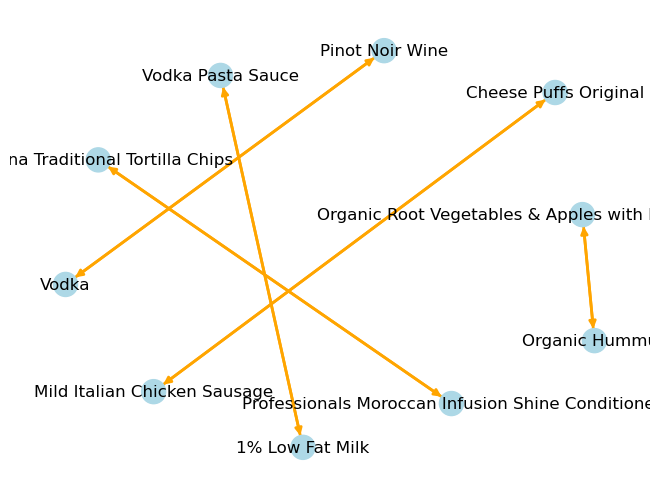

In [120]:
draw_graph(g0, rules_to_show=10)

In [110]:
g1.sort_values('lift', ascending=False).head(5)

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
83,98,frozenset({'Organic Honey Sweet Whole Wheat Br...,frozenset({'Unsweetened Premium Iced Tea'}),0.001112,0.001112,0.001112,1.0,899.0,0.001111,inf
89,105,frozenset({'Organic Yellow Onion'}),frozenset({'Broccoli & Cheese Stuffed Chicken ...,0.001112,0.001112,0.001112,1.0,899.0,0.001111,inf
117,143,frozenset({'Water'}),frozenset({'Fat Free French Vanilla Creamer'}),0.001112,0.001112,0.001112,1.0,899.0,0.001111,inf
116,142,"frozenset({'Deli Fresh Smoked Ham, 97% Fat Fre...",frozenset({'Honey Nut Dream Granola'}),0.001112,0.001112,0.001112,1.0,899.0,0.001111,inf
115,141,frozenset({'Honey Nut Dream Granola'}),"frozenset({'Deli Fresh Smoked Ham, 97% Fat Fre...",0.001112,0.001112,0.001112,1.0,899.0,0.001111,inf


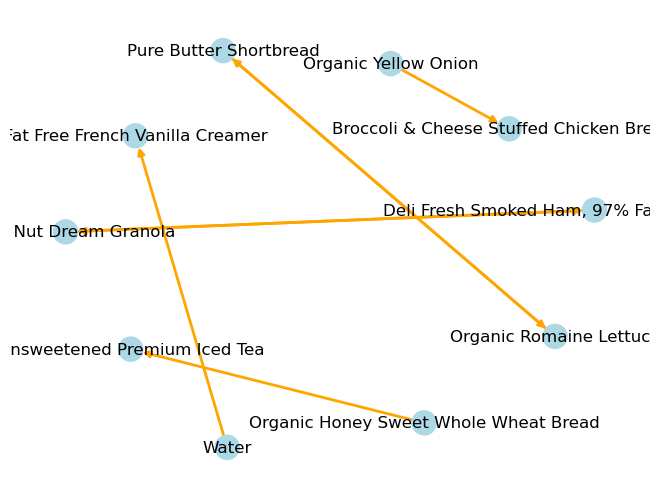

In [119]:
draw_graph(g1, rules_to_show=7)

In [82]:
g2.sort_values('lift', ascending=False).head(5)

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,47,frozenset({'Organic Baby Broccoli'}),frozenset({'Organic Chicken Stock'}),0.001064,0.001064,0.001064,1.0,940.0,0.001063,inf
38,46,frozenset({'Organic Chicken Stock'}),frozenset({'Organic Baby Broccoli'}),0.001064,0.001064,0.001064,1.0,940.0,0.001063,inf
27,32,"frozenset({'Cacao Almond Milk', 'Organic Thyme'})",frozenset({'Organic Sparkling Cider'}),0.001064,0.001064,0.001064,1.0,940.0,0.001063,inf
28,33,"frozenset({'Organic Sparkling Cider', 'Organic...",frozenset({'Cacao Almond Milk'}),0.001064,0.001064,0.001064,1.0,940.0,0.001063,inf
29,34,frozenset({'Cacao Almond Milk'}),"frozenset({'Organic Sparkling Cider', 'Organic...",0.001064,0.001064,0.001064,1.0,940.0,0.001063,inf


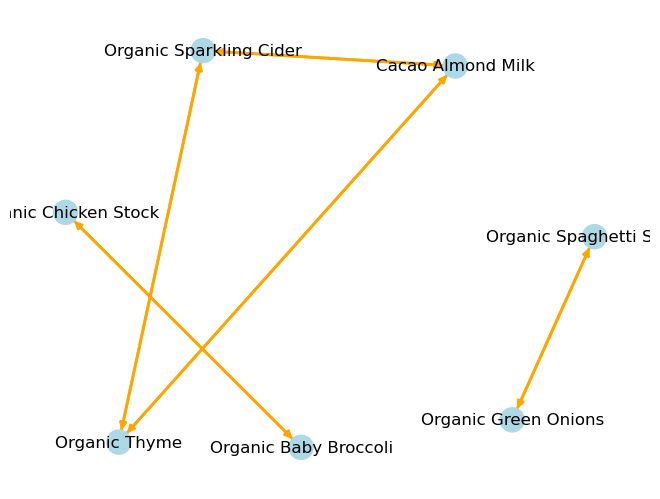

In [116]:
draw_graph(g2, rules_to_show=10)

In [112]:
g3.sort_values('lift', ascending=False).head(5)

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,0,frozenset({'Organic Tomato Sauce'}),frozenset({'100% Recycled Bathroom Tissue'}),0.001361,0.001361,0.001361,1.0,735.0,0.001359,inf
975,1130,"frozenset({'Organic Yellow Onion', 'Air Chille...","frozenset({'Shredded Mozzarella', 'Apple Cider...",0.001361,0.001361,0.001361,1.0,735.0,0.001359,inf
986,1143,"frozenset({'Organic Yellow Onion', 'Shredded M...","frozenset({'Lemon Ginger Tea Bags', 'Air Chill...",0.001361,0.001361,0.001361,1.0,735.0,0.001359,inf
982,1139,"frozenset({'Organic Yellow Onion', 'Shredded M...",frozenset({'Air Chilled Organic Boneless Skinl...,0.001361,0.001361,0.001361,1.0,735.0,0.001359,inf
981,1137,frozenset({'Apple Cider Vinegar'}),"frozenset({'Organic Yellow Onion', 'Shredded M...",0.001361,0.001361,0.001361,1.0,735.0,0.001359,inf


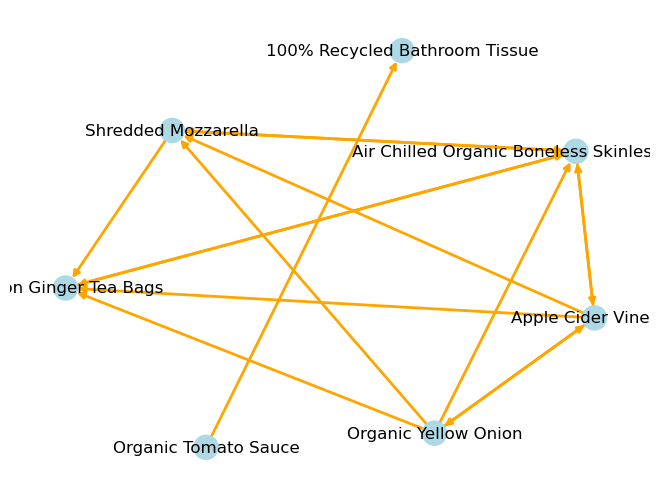

In [124]:
draw_graph(g3, rules_to_show=5)